# Q-learning Demo

for each s, initialize tabel entry $\hat{Q} (s,a) \leftarrow 0$

observe current state s

do loop:
* Select an action a and execute
* Receive immidiate reward r
* Observe the new state s'
* Update the table entry for $\hat{Q} (s,a)$ as: </p>
$\hat{Q} (s,a) \leftarrow r + max_{a'} \hat{Q} (s', a')$ </p>
* $ s \leftarrow s'$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as pr
%matplotlib inline

In [2]:
def rargmax(vector):
    """ Argmax that chooses randomly among eligible maximum indices. """
    m = np.amax(vector)
    indices = np.nonzero(vector == m)[0]
    return pr.choice(indices)

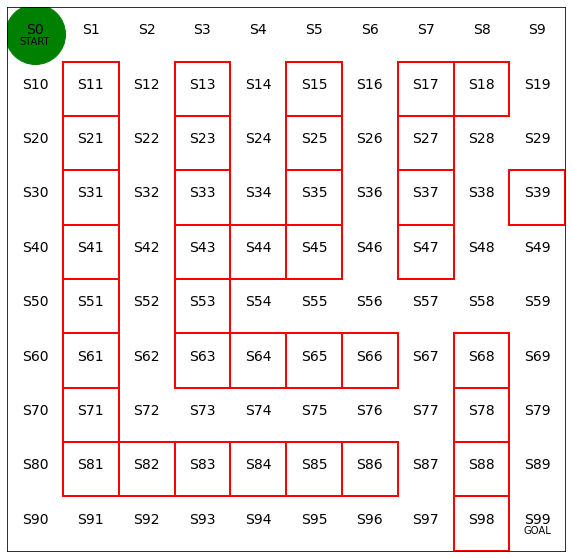

In [3]:
# Frozen lake 크기설정
xlim = 10
ylim = 10
state_max = xlim * ylim - 1

# 전체 그림의 크기 및 그림을 나타내는 변수 선언
fig = plt.figure(figsize=(10, 10))
ax = plt.gca()

# 구멍 벽 그리기
def hole(i: int, j: int) -> None:
    plt.plot([i+1, i+1], [j+1, j], color='red', linewidth=2)
    plt.plot([i, i+1], [j, j], color='red', linewidth=2)
    plt.plot([i, i], [j+1, j], color='red', linewidth=2)
    plt.plot([i, i+1], [j+1, j+1], color='red', linewidth=2)
    
        
# 그림을 그릴 범위 및 눈금 제거 설정
ax.set_xlim(0, xlim)
ax.set_ylim(0, ylim)
plt.tick_params(axis='both', which='both', bottom=False, top=False,
                labelbottom=False, right=False, left=False, labelleft=False)

# # 구멍 state array 및 테두리 생성
# num_holes = 10
# holes_state = np.zeros(num_holes)
# ran_num = np.random.randint(1, state_max - 2)
# for i in range(num_holes):
#     while ran_num in holes_state:
#         ran_num = np.random.randint(1, state_max - 2)
#     holes_state[i] = ran_num
# for i in holes_state:
#     hole(holes_state % xlim, ylim - (holes_state // xlim) - 1)

# user-defined holes
holes_state = np.array([15,25,35,45,44,
                        17,27,37,47,
                        18,39,68,
                        11,21,31,41,51,61,71,81,82,83,84,85,86,88,98,
                        78,66,65,64,63,53,43,33,23,13])
for i in holes_state:
    hole(holes_state % xlim, ylim - (holes_state // xlim) - 1)

# 상태를 의미하는 state 표시
state_num = 0
for i in range(ylim,0,-1):
    for j in range(xlim):
        plt.text(j+0.5, i-0.5, f'S{state_num}',size=14,ha = 'center')
        state_num += 1

plt.text(0.5, ylim - 0.7, 'START', ha='center')
plt.text(xlim - 0.5, 0.3, 'GOAL', ha='center')

# S0에 녹색 원으로 현재 위치를 표시
line, = ax.plot([0.5], [ylim - 0.5], marker="o", color='g', markersize=60)

In [4]:
def get_next_state(s: int, action: int, state_max:int) -> list:
    '''
    Find new state, reward, and done with current state and action
    '''
    done_new = False
    reward_new = 0
    direction = ["up", "right", "down", "left"]
    next_direction = direction[action]

    if next_direction == "up":
        s_next = s - xlim  # 위로 이동하면 상태값이 xlim 줄어든다
    elif next_direction == "right":
        s_next = s + 1  # 오른쪽으로 이동하면 상태값이 1 늘어난다
    elif next_direction == "down":
        s_next = s + xlim  # 아래로 이동하면 상태값이 xlim 늘어난다
    elif next_direction == "left":
        s_next = s - 1  # 왼쪽으로 이동하면 상태값이 1 줄어든다
    
#     if (s_next in holes_state) or s_next < 0 or s_next > state_max:
#         reward_new -= 1
#         done_new = True
        
    if s_next in holes_state:  # next state = hole
        reward_new -= 1
        done_new = True
        
    if s_next < 0 or s_next > state_max:  # out of index up & down
        reward_new -= 100
        done_new = True
        
    if s_next == state_max:  # arrived at goal
        reward_new += 1
        done_new = True

    return [s_next, reward_new, done_new]

[0,
 1,
 2,
 12,
 22,
 32,
 42,
 52,
 62,
 72,
 73,
 74,
 75,
 76,
 77,
 67,
 57,
 58,
 59,
 69,
 79,
 89,
 99]

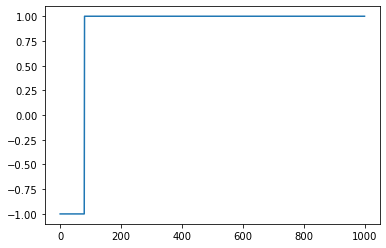

In [8]:
Q = np.zeros([state_max + 1, 4])  # Initialize Q

'''Set boundary with arbitary Q'''
for i in range(0,state_max - xlim+2,xlim):  # set left and right boundary with Q = -100
    Q[i,3] = -100
    Q[i + (xlim - 1),1] = -100

for j in range(xlim):  #
    Q[j,0] = -100
    Q[state_max + 1 - xlim + j,2] = -100

num_episodes = 1000  # number of iteration(learn)

rList = []  # store total rewards per iteration
sList = []  # store total state history per iteration

for i in range(num_episodes):
    '''Learning loop'''
    state = 0  # current state
    rAll = 0  # total reward per iteration
    done = False  # determine whether the game is done
    state_history = [0]  # state history per iteration
    
    while not done:
        action = rargmax(Q[state,:])  # find argmax_Q of current block
        
        new_state, reward, done = get_next_state(state, action, state_max)  # get next information and reward from action
        
        if new_state < 0 or new_state >= state_max:  # break for index error (인덱스 넘어섬 오류 방지 위한 if 문)
            Q[state, action] = reward
            state = new_state
            rAll += reward
            state_history.append(new_state)
            break
        
        Q[state, action] = reward + np.max(Q[new_state,:])  # CORE ALGORITHM
        state = new_state
        rAll += reward
        state_history.append(new_state)
    
    sList.append(state_history)
    rList.append(rAll)
    
plt.plot(rList);  # reward graph
state_history  # last movement

In [9]:
# 에이전트의 이동 과정을 시각화
# 참고 URL http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
from matplotlib import animation
from IPython.display import HTML


def init():
    '''배경 이미지 초기화'''
    line.set_data([], [])
    return (line,)


def animate(i):
    '''프레임 단위로 이미지 생성'''
    state = state_history[i]  # 현재 위치
    x = (state % xlim) + 0.5  # 상태의 x좌표 : 3으로 나눈 나머지 + 0.5
    y = ylim - 0.5 - (state // xlim)  # y좌표 : 2.5에서 3으로 나눈 몫을 뺌
    line.set_data(x, y)
    return (line,)


# 초기화 함수와 프레임 단위 이미지 생성함수를 사용하여 애니메이션 생성
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(
    state_history), interval=200, repeat=False)

HTML(anim.to_jshtml())